# Unit 5 - Financial Planning

In [94]:
# Initial imports

# We are going to use the new alpaca trading library `alpaca-py` as the `alpaca-trade-api` is now being deprecated
from    alpaca.data.historical import StockHistoricalDataClient
from    alpaca.data.requests   import StockBarsRequest, StockQuotesRequest
from    alpaca.data.timeframe  import TimeFrame

# Utility imports
from    MCForecastTools        import MCSimulation
from    dotenv                 import load_dotenv
from    datetime               import *
from    dateutil.relativedelta import *
import  calendar
import  pandas as pd
import  requests
import  os

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [4]:
# Fetch current BTC price
response = requests.get(
    url=btc_url
)

# Check for API call errors
response.raise_for_status()

# Retrieve the price
btc_price = response.json()["data"]["1"]["quotes"]["USD"]["price"]
btc_price

19427.73

In [5]:
# Fetch current ETH price
response = requests.get(
    url=eth_url
)
# Check for API call errors
response.raise_for_status()

# Retrieve the price
eth_price = response.json()["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

1291.95

In [6]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23313.28
The current value of your 5.3 ETH is $6847.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Load .env enviroment variables
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA-API-KEY-ID")
alpaca_secret_key = os.getenv("APCA-API-SECRET-KEY")
if not(alpaca_api_key) or not(alpaca_secret_key):
    print("Failed to load API credentials")


In [10]:
# Create the Alpaca API object
# Instantiate a client object for historical data
client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)
client

In [11]:
# Format current date as ISO format
today = pd.Timestamp.today(tz="America/New_York").isoformat()

# Set the date back 2 days for the new alpaca API to work and not 
# return an error saying my subscription does not allow me to retrieve data from the last 15 minutes
# today = pd.to_datetime(today) + pd.to_timedelta(-2, unit='day')
today = pd.to_datetime(today) + pd.to_timedelta(-2, unit='day')
today


Timestamp('2022-10-12 06:02:49.414720-0400', tz='pytz.FixedOffset(-240)')

In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
# timeframe = "1Day"
timeframe = TimeFrame.Day
timeframe


In [30]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# Request bar data for the tickers using the new alpaca API
# request_params = StockBarsRequest(
request_params = StockBarsRequest(
    symbol_or_symbols   = tickers,
    timeframe           = timeframe,
    start               = today
)

bars = client.get_stock_bars(request_params)
investments_df   = bars.df
investments_df

,,open,high,low,close,volume,trade_count,vwap
symbol,timestamp,,,,,,,
AGG,2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878.0,23778.0,95.068272
SPY,2022-10-13 04:00:00+00:00,349.43,367.51,348.11,365.97,145171940.0,1098996.0,359.798331


In [35]:
# Retrieve closing prices for each stock
agg_close_price = investments_df.loc[("AGG")].close.values[0]
spy_close_price = investments_df.loc[("SPY")].close.values[0]
display(agg_close_price)
display(spy_close_price)

95.18

365.97

In [38]:
# Reorganize the DataFrame
# Separate ticker data
agg_df = investments_df.loc["AGG"]
spy_df = investments_df.loc["SPY"]
display(agg_df.head())
display(agg_df.head())
# Concatenate the ticker DataFrames
portfolio_df = pd.concat([agg_df, spy_df], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
portfolio_df.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878.0,23778.0,95.068272


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878.0,23778.0,95.068272


AGG                                              \
                            open   high    low  close     volume trade_count   
timestamp                                                                      
2022-10-13 04:00:00+00:00  94.23  95.44  94.18  95.18  6231878.0     23778.0   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-13 04:00:00+00:00  95.068272  349.43  367.51  348.11  365.97   

                                                                
                                volume trade_count        vwap  
timestamp                                                       
2022-10-13 04:00:00+00:00  145171940.0   1098996.0  359.798331

In [36]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.18
Current SPY closing price: $365.97


In [37]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18298.50
The current value of your 200 AGG shares is $19036.00


### Savings Health Analysis

In [49]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
financial_assets = {
    "index"  : ["crypto", "shares"],
    "amount" : [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
}

# Create savings DataFrame
df_savings = pd.DataFrame(
    data=financial_assets, 
    index=financial_assets["index"]
).drop(
    columns=["index"]
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,30160.611
shares,37334.500


<AxesSubplot:ylabel='amount'>

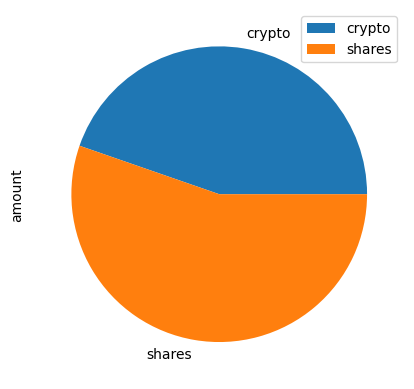

In [51]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [126]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal of saving ${emergency_fund}.")
else:
    print(f"You have not yet reached your financial goal of ${emergency_fund}, you have a shortfall of ${(emergency_fund - total_savings):0.2f}.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [112]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end_date = pd.to_datetime(
    pd.Timestamp.now(tz="America/New_York")
)
# Let's make it Friday last week at 3pm to ensure it is a trading day
end_date   = end_date + relativedelta(
    weekday=calendar.FRIDAY, 
    weeks  = -1, 
    hour   =15, 
    minute =0, 
    second =0
)

# Set start date to 5 years prior to end_date also on a Friday at 3pm 
start_date = end_date + relativedelta(
    weekday=calendar.FRIDAY,
    years = -5
)

print(end_date)
print(start_date)

2022-10-07 15:00:00.345311-04:00
2017-10-13 15:00:00.345311-04:00


In [114]:
# Get 5 years' worth of historical data for SPY and AGG
request_params = StockBarsRequest(
    symbol_or_symbols   = tickers,
    timeframe           = timeframe,
    start               = start_date,
    end                 = end_date
)

bars = client.get_stock_bars(request_params)
investments_df   = bars.df
investments_df

open      high       low   close  \
symbol timestamp                                                       
AGG    2017-10-16 04:00:00+00:00  109.75  109.8100  109.6600  109.75   
       2017-10-17 04:00:00+00:00  109.62  109.7400  109.5500  109.71   
       2017-10-18 04:00:00+00:00  109.51  109.5600  109.4600  109.54   
       2017-10-19 04:00:00+00:00  109.71  109.7500  109.5400  109.62   
       2017-10-20 04:00:00+00:00  109.32  109.4050  109.2600  109.30   
...                                  ...       ...       ...     ...   
SPY    2022-10-03 04:00:00+00:00  361.12  368.5500  359.2100  366.61   
       2022-10-04 04:00:00+00:00  372.45  378.0000  366.5677  377.97   
       2022-10-05 04:00:00+00:00  373.32  379.4600  370.9500  377.09   
       2022-10-06 04:00:00+00:00  375.65  378.7200  372.6800  373.20   
       2022-10-07 04:00:00+00:00  369.06  373.2933  360.9400  362.79   

                                       volume  trade_count        vwap  
symbol timestamp                                                        
AGG    2017-10-16 04:00:00+00:00    3788344.0      11029.0  109.773173  
       2017-10-17 04:00:00+00:00    1764880.0       9926.0  109.701937  
       2017-10-18 04:00:00+00:00    1663837.0       8996.0  109.521550  
       2017-10-19 04:00:00+00:00    1876987.0       9425.0  109.651062  
       2017-10-20 04:00:00+00:00    2014321.0       9709.0  109.323959  
...                                       ...          ...         ...  
SPY    2022-10-03 04:00:00+00:00   89052594.0     617784.0  364.702960  
       2022-10-04 04:00:00+00:00  102736573.0     683092.0  375.718180  
       2022-10-05 04:00:00+00:00   87641027.0     581349.0  375.456940  
       2022-10-06 04:00:00+00:00   81289636.0     577715.0  374.901554  
       2022-10-07 04:00:00+00:00  107239188.0     665841.0  365.065822  

[2508 rows x 7 columns]

In [116]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
agg_df = investments_df.loc["AGG"]
spy_df = investments_df.loc["SPY"]
display(agg_df.head())
display(agg_df.head())

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df, spy_df], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-10-16 04:00:00+00:00,109.75,109.810,109.66,109.75,3788344.0,11029.0,109.773173
2017-10-17 04:00:00+00:00,109.62,109.740,109.55,109.71,1764880.0,9926.0,109.701937
2017-10-18 04:00:00+00:00,109.51,109.560,109.46,109.54,1663837.0,8996.0,109.521550
2017-10-19 04:00:00+00:00,109.71,109.750,109.54,109.62,1876987.0,9425.0,109.651062
2017-10-20 04:00:00+00:00,109.32,109.405,109.26,109.30,2014321.0,9709.0,109.323959


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-10-16 04:00:00+00:00,109.75,109.810,109.66,109.75,3788344.0,11029.0,109.773173
2017-10-17 04:00:00+00:00,109.62,109.740,109.55,109.71,1764880.0,9926.0,109.701937
2017-10-18 04:00:00+00:00,109.51,109.560,109.46,109.54,1663837.0,8996.0,109.521550
2017-10-19 04:00:00+00:00,109.71,109.750,109.54,109.62,1876987.0,9425.0,109.651062
2017-10-20 04:00:00+00:00,109.32,109.405,109.26,109.30,2014321.0,9709.0,109.323959


AGG                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-10-16 04:00:00+00:00  109.75  109.810  109.66  109.75  3788344.0   
2017-10-17 04:00:00+00:00  109.62  109.740  109.55  109.71  1764880.0   
2017-10-18 04:00:00+00:00  109.51  109.560  109.46  109.54  1663837.0   
2017-10-19 04:00:00+00:00  109.71  109.750  109.54  109.62  1876987.0   
2017-10-20 04:00:00+00:00  109.32  109.405  109.26  109.30  2014321.0   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-10-16 04:00:00+00:00     11029.0  109.773173  255.20  255.51  254.8200   
2017-10-17 04:00:00+00:00      9926.0  109.701937  255.24  255.52  254.9800   
2017-10-18 04:00:00+00:00      8996.0  109.521550  255.92  255.95  255.5000   
2017-10-19 04:00:00+00:00      9425.0  109.651062  254.83  255.83  254.3500   
2017-10-20 04:00:00+00:00      9709.0  109.323959  256.73  257.14  255.7744   

                                                                       
                            close      volume trade_count        vwap  
timestamp                                                              
2017-10-16 04:00:00+00:00  255.29  38608777.0    128094.0  255.168262  
2017-10-17 04:00:00+00:00  255.47  32507646.0    120555.0  254.627844  
2017-10-18 04:00:00+00:00  255.72  40936574.0    121862.0  255.720138  
2017-10-19 04:00:00+00:00  255.79  61948288.0    190692.0  255.297268  
2017-10-20 04:00:00+00:00  257.11  89178367.0    196614.0  256.766187

In [152]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.40, 0.60]
years = 30
MC_sim = MCSimulation(
    portfolio_data   = df_stock_data,
    weights          = weights,
    num_simulation   = num_sims,
    num_trading_days = 252 * years
)

In [153]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-10-16 04:00:00+00:00  109.75  109.810  109.66  109.75  3788344.0   
2017-10-17 04:00:00+00:00  109.62  109.740  109.55  109.71  1764880.0   
2017-10-18 04:00:00+00:00  109.51  109.560  109.46  109.54  1663837.0   
2017-10-19 04:00:00+00:00  109.71  109.750  109.54  109.62  1876987.0   
2017-10-20 04:00:00+00:00  109.32  109.405  109.26  109.30  2014321.0   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-16 04:00:00+00:00     11029.0  109.773173          NaN  255.20   
2017-10-17 04:00:00+00:00      9926.0  109.701937    -0.000364  255.24   
2017-10-18 04:00:00+00:00      8996.0  109.521550    -0.001550  255.92   
2017-10-19 04:00:00+00:00      9425.0  109.651062     0.000730  254.83   
2017-10-20 04:00:00+00:00      9709.0  109.323959    -0.002919  256.73   

                                                                             \
                             high       low   close      volume trade_count   
timestamp                                                                     
2017-10-16 04:00:00+00:00  255.51  254.8200  255.29  38608777.0    128094.0   
2017-10-17 04:00:00+00:00  255.52  254.9800  255.47  32507646.0    120555.0   
2017-10-18 04:00:00+00:00  255.95  255.5000  255.72  40936574.0    121862.0   
2017-10-19 04:00:00+00:00  255.83  254.3500  255.79  61948288.0    190692.0   
2017-10-20 04:00:00+00:00  257.14  255.7744  257.11  89178367.0    196614.0   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-16 04:00:00+00:00  255.168262          NaN  
2017-10-17 04:00:00+00:00  254.627844     0.000705  
2017-10-18 04:00:00+00:00  255.720138     0.000979  
2017-10-19 04:00:00+00:00  255.297268     0.000274  
2017-10-20 04:00:00+00:00  256.766187     0.005160

In [154]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/home/gadam/projects/fintech/fintech_assessment_04/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011592,0.989626,1.004949,0.987558,1.005934,1.000726,0.998709,1.002965,1.018245,1.001393,...,1.002187,1.013537,1.008371,0.994081,0.994366,1.002136,0.995743,1.012686,1.005186,1.012199
2,1.018134,0.984910,1.006022,0.985634,1.005227,1.011623,1.002876,1.012997,1.010147,0.996457,...,1.008712,1.017722,1.017336,1.011161,0.992649,1.013161,0.994892,1.001567,1.013459,1.019123
3,1.032192,1.000908,1.009255,0.969546,0.999563,1.012921,1.009402,1.020602,1.004186,0.980840,...,0.996800,1.014703,1.026024,1.015030,0.991307,1.016672,0.992973,0.993937,1.005880,1.013463
4,1.025414,1.001657,1.004689,0.969138,0.998218,1.019609,1.011089,1.005173,1.014105,0.974162,...,1.015082,1.020640,1.033473,1.020892,0.990558,1.011622,1.001415,0.992618,1.015937,1.018406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.043035,1.224304,3.637642,4.460606,5.412046,3.954219,1.344092,3.565220,0.890134,1.300375,...,1.644561,3.415139,22.503819,3.582080,2.124577,7.323074,1.117223,7.116334,9.400021,7.901581
7557,3.055329,1.228602,3.604680,4.385740,5.469510,3.967953,1.347368,3.570646,0.884045,1.312060,...,1.640883,3.434455,22.758992,3.581578,2.114489,7.303282,1.106979,7.047297,9.418160,7.952379
7558,3.074128,1.237419,3.646538,4.318355,5.521125,3.921731,1.348247,3.571705,0.875608,1.336437,...,1.643906,3.428436,22.651313,3.578564,2.090252,7.193672,1.093546,7.090502,9.459798,7.981893
7559,3.092403,1.223849,3.670693,4.307722,5.563488,3.920595,1.339692,3.562597,0.876936,1.350564,...,1.625975,3.418698,23.093021,3.538159,2.112186,7.240172,1.096161,7.151517,9.403821,7.843666


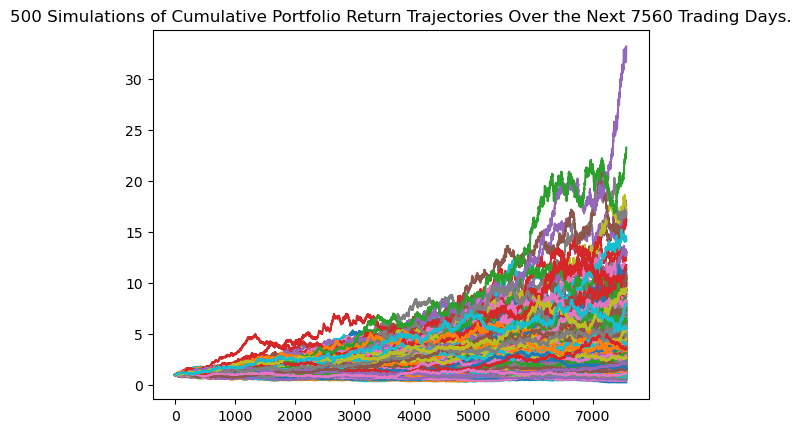

In [155]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

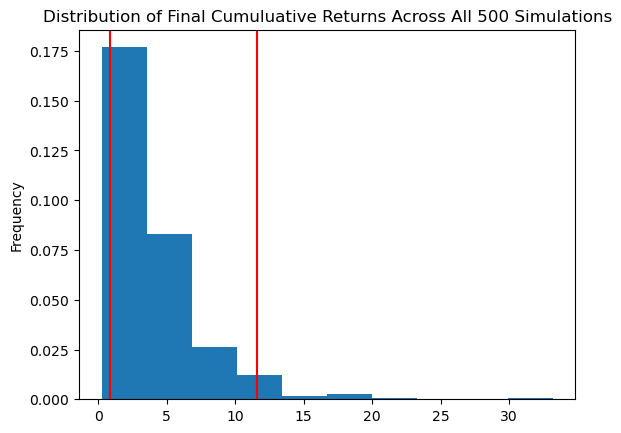

In [156]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [157]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.006179
std               3.289437
min               0.250913
25%               1.990829
50%               3.094401
75%               4.756805
max              33.170273
95% CI Lower      0.822262
95% CI Upper     11.581833
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [158]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16445.24 and $231636.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [159]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl["95% CI Lower"] * initial_investment, 2)
ci_upper = round(tbl["95% CI Upper"] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24667.85 and $347454.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


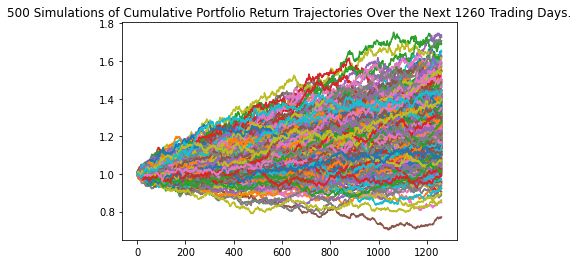

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

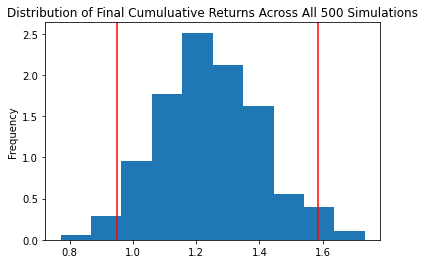

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


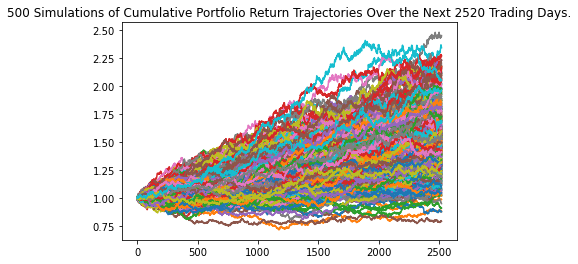

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

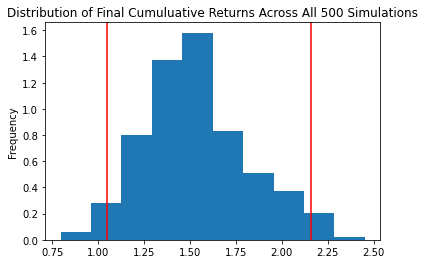

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
